<a href="https://colab.research.google.com/github/jayakhan/document-classification/blob/main/naive_bayes_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1) Load Libraries

In [ ]:
from pathlib import Path
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
import time
import pickle

from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
from sklearn.model_selection import train_test_split

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
STOPWORDS = set(stopwords.words('english'))
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 

## 2) Load Dataset

In [2]:
# Adding Dataset into articles and labels list
articles = []
labels = []
with open('/content/synthetic_data.txt') as file:
  docs = file.readlines()
  for line in docs:
    labels.append(line.split('\t')[0])
    article = line.split('\t')[1]
    # Filter data based on STOPWORDS
    for word in STOPWORDS:
      token = ' ' + word + ' '
      article = article.replace(token, ' ')
      article = article.replace(' ', ' ')
    articles.append(article)

In [3]:
# Clean Label Names
labels_new = []
for i in labels:
  i = i.replace('.', '')
  i = i.replace('-', '')
  labels_new.append(i)

## 3) Plot Distribution of Articles across Labels

In [4]:
LABELS = ['altatheism', 'compgraphics', 'composmswindowsmisc', 'compsysibmpchardware', 'compsysmachardware', 'compwindowsx', 'miscforsale', 'recautos', 'recmotorcycles', 'recsportbaseball',
              'recsporthockey', 'scicrypt', 'scielectronics', 'scimed', 'scispace', 'socreligionchristian', 'talkpoliticsguns', 'talkpoliticsmideast', 'talkpoliticsmisc', 'talkreligionmisc']

In [5]:
labels = pd.DataFrame(labels_new)
new = pd.DataFrame(0, index=np.arange(len(labels)), columns=LABELS)

In [6]:
new['recmotorcycles'] = np.where(labels == 'recmotorcycles', 1, 0)
new['recsportbaseball'] = np.where(labels == 'recsportbaseball', 1, 0)
new['recsporthockey'] = np.where(labels == 'recsporthockey', 1, 0)
new['scicrypt'] = np.where(labels == 'scicrypt', 1, 0)
new['scielectronics'] = np.where(labels == 'scielectronics', 1, 0)
new['scimed'] = np.where(labels == 'scimed', 1, 0)
new['scispace'] = np.where(labels == 'scispace', 1, 0)
new['socreligionchristian'] = np.where(labels == 'socreligionchristian', 1, 0)
new['talkpoliticsguns'] = np.where(labels == 'talkpoliticsguns', 1, 0)
new['talkpoliticsmideast'] = np.where(labels == 'talkpoliticsmideast', 1, 0)
new['talkpoliticsmisc'] = np.where(labels == 'talkpoliticsmisc', 1, 0)
new['talkreligionmisc'] = np.where(labels == 'talkreligionmisc', 1, 0)
new['recautos'] = np.where(labels == 'recautos', 1, 0)
new['altatheism'] = np.where(labels == 'altatheism', 1, 0)
new['compgraphics'] = np.where(labels == 'compgraphics', 1, 0)
new['composmswindowsmisc'] = np.where(labels == 'composmswindowsmisc', 1, 0)
new['compsysibmpchardware'] = np.where(labels == 'compsysibmpchardware', 1, 0)
new['compsysmachardware'] = np.where(labels == 'compsysmachardware', 1, 0)
new['compwindowsx'] = np.where(labels == 'compwindowsx', 1, 0)
new['miscforsale'] = np.where(labels == 'miscforsale', 1, 0)

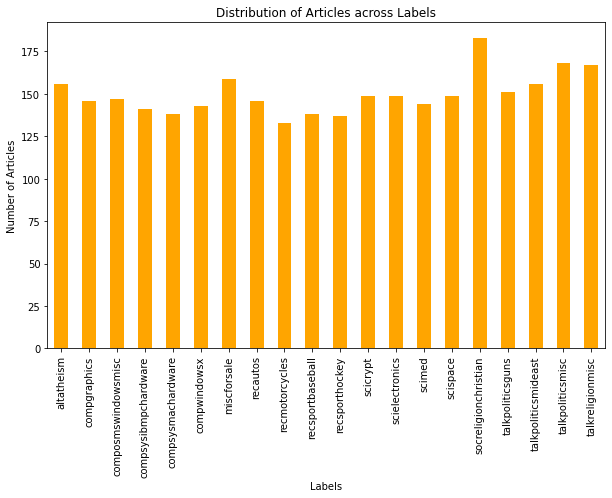

In [7]:
# Plot label data
plt.figure(figsize=(10,6))
new.sum(axis=0).plot.bar(color='orange')
plt.xlabel("Labels")
plt.ylabel("Number of Articles")
plt.title("Distribution of Articles across Labels")
plt.show()

## 4) Split data into 70% training and 30% validation datasets

In [8]:
train_articles, validation_articles, train_labels, validation_labels = train_test_split(articles, labels_new, test_size=0.3, stratify=labels_new)

In [9]:
print(len(train_articles))
print(len(train_labels))
print(len(validation_articles))
print(len(validation_labels))

2100
2100
900
900


## 5) Lemmatization and Vectorization

In [10]:
"""This class uses WordNetLemmatizer to stem words with length more than two"""
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()

    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc) if len(t) >= 2]

In [11]:
# Load CountVectorizer API
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(input='content', analyzer='word', tokenizer=LemmaTokenizer(), max_features=2000)

In [12]:
# Convert Articles to their vector sparse representation
X_train_cv = cv.fit_transform(train_articles)
X_test_cv = cv.transform(validation_articles)

## 6) Model Building

In [13]:
#Train the model
naive_bayes = MultinomialNB(alpha=1)
start_time = time.time()
naive_bayes.fit(X_train_cv, train_labels)
print('Done. Time elapsed: {:.2f}s'.format(time.time() - start_time))

Done. Time elapsed: 0.03s


In [14]:
#Predict labels for validation dataset via trained model
start_time = time.time()
predictions = naive_bayes.predict(X_test_cv)
print('Done. Time elapsed: {:.2f}s'.format(time.time() - start_time))

Done. Time elapsed: 0.01s


In [18]:
# Save model
f = open('naive_bayes_sd.pickle', 'wb')
pickle.dump(naive_bayes, f)
f.close()

In [19]:
predictions[:10]

array(['compsysmachardware', 'composmswindowsmisc', 'composmswindowsmisc',
       'miscforsale', 'compgraphics', 'recmotorcycles', 'recsporthockey',
       'socreligionchristian', 'talkpoliticsmisc', 'compwindowsx'],
      dtype='<U20')

## 7) Model Evaluation

In [20]:
print('Accuracy score: ', accuracy_score(validation_labels, predictions))
print('Precision score: ', precision_score(validation_labels, predictions, average='weighted', labels=np.unique(validation_labels)))
print('Recall score: ', recall_score(validation_labels, predictions, average='weighted', labels=np.unique(validation_labels)))
print('F1 score: ', f1_score(validation_labels, predictions, average='weighted', labels=np.unique(validation_labels)))

Accuracy score:  1.0
Precision score:  1.0
Recall score:  1.0
F1 score:  1.0


In [21]:
from sklearn.metrics import classification_report
print(classification_report(validation_labels, predictions, target_names=LABELS))

                      precision    recall  f1-score   support

          altatheism       1.00      1.00      1.00        47
        compgraphics       1.00      1.00      1.00        44
 composmswindowsmisc       1.00      1.00      1.00        44
compsysibmpchardware       1.00      1.00      1.00        42
  compsysmachardware       1.00      1.00      1.00        41
        compwindowsx       1.00      1.00      1.00        43
         miscforsale       1.00      1.00      1.00        48
            recautos       1.00      1.00      1.00        44
      recmotorcycles       1.00      1.00      1.00        40
    recsportbaseball       1.00      1.00      1.00        41
      recsporthockey       1.00      1.00      1.00        41
            scicrypt       1.00      1.00      1.00        45
      scielectronics       1.00      1.00      1.00        45
              scimed       1.00      1.00      1.00        43
            scispace       1.00      1.00      1.00        45
socreli